In [117]:
# importing libraries
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

In [90]:
#importing the excel file
dataset_csv = pds.read_csv('data.csv')
dataset_csv.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [91]:
#performing exploratory data analysis
print("no of rows and coloumn old",dataset_csv.shape )
new_dataset_csv = dataset_csv.dropna()
print("no of rows and coloumn new",new_dataset_csv.shape )

no of rows and coloumn old (569, 33)
no of rows and coloumn new (0, 33)


In [92]:
#checking for the duplicate data
print(new_dataset_csv.duplicated())
new_dataset_csv.drop_duplicates()
new_dataset_csv.shape
print("No duplicate data")


Series([], dtype: bool)
No duplicate data


In [93]:
dataset_csv.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [94]:
dataset_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [95]:
#displaying null values
dataset_csv.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [96]:
#data analysis between radius_mean and perimeter_mean
radius_count = dataset_csv['radius_mean'].value_counts()
print("radius \n", radius_count)
perimeter_count = dataset_csv['perimeter_mean'].value_counts()
print("perimeter \n", perimeter_count)

radius 
 12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius_mean, Length: 456, dtype: int64
perimeter 
 82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: perimeter_mean, Length: 522, dtype: int64


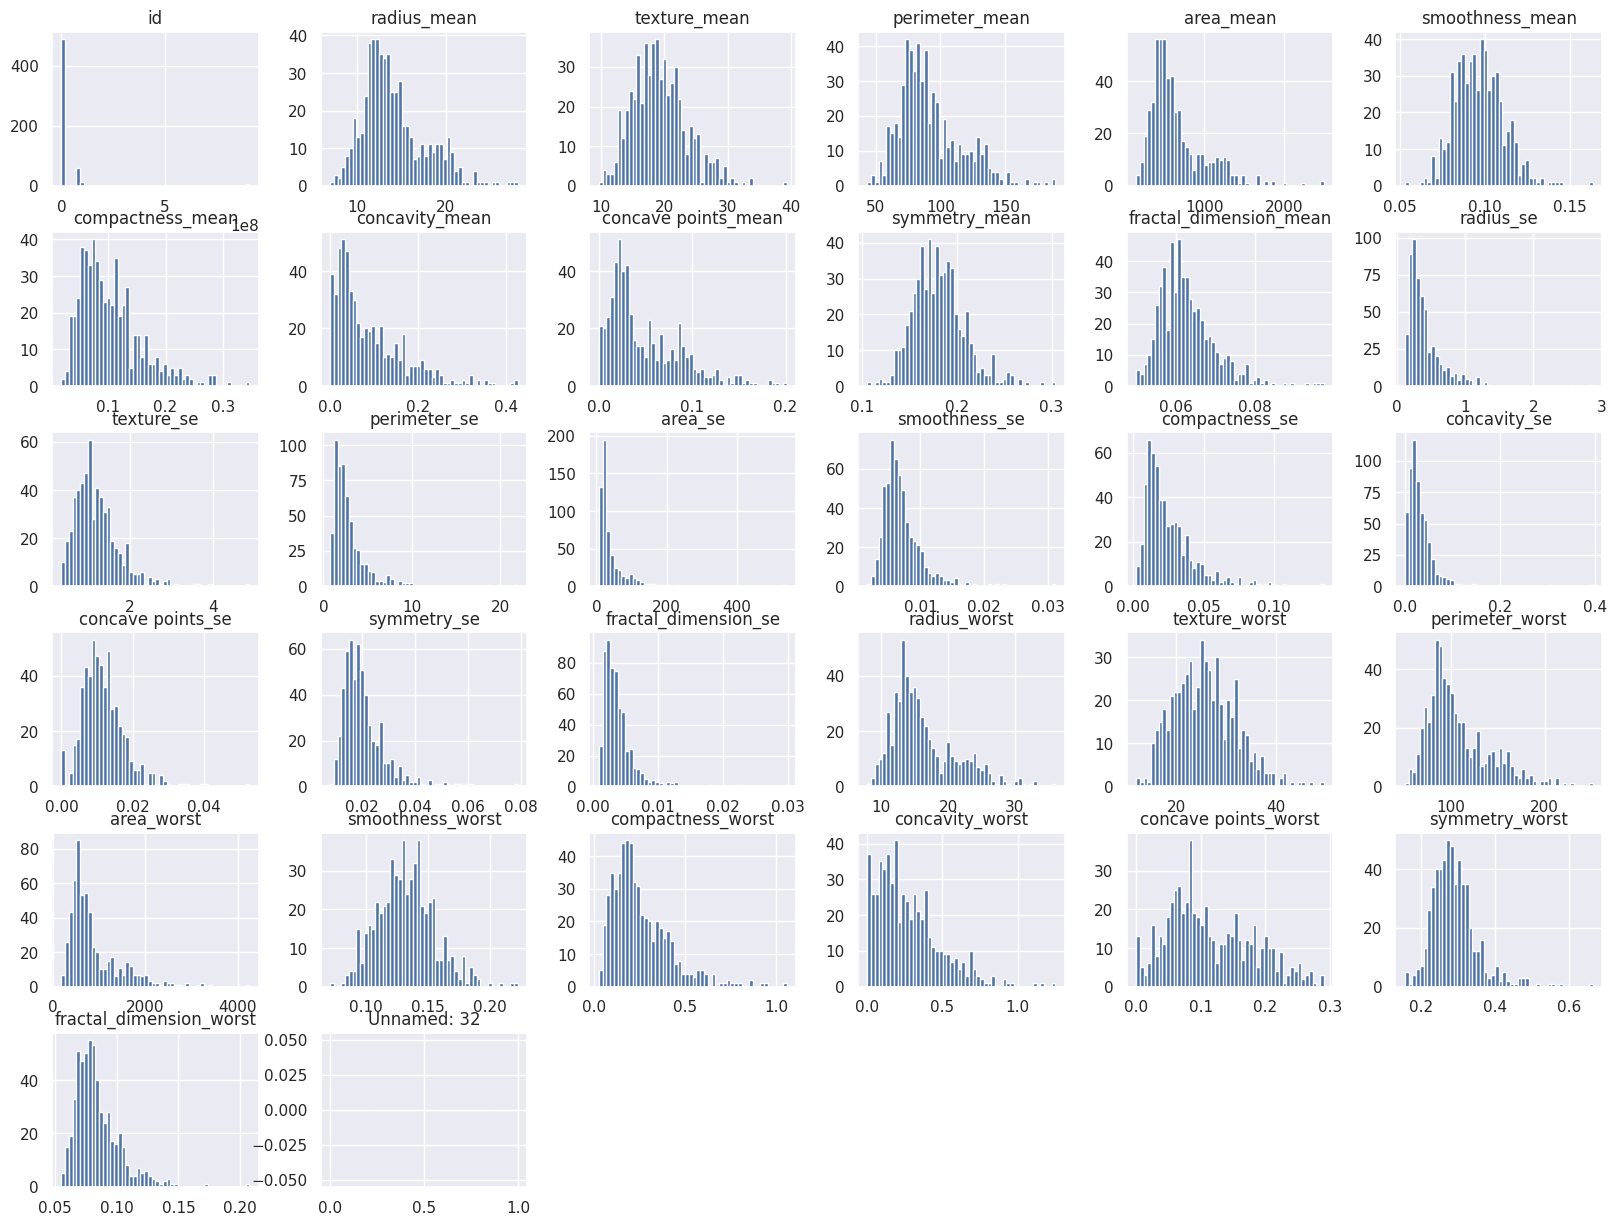

In [97]:
dataset_csv.hist(bins=50, figsize=(20,15))
plt.show()

In [98]:
#visualizing the data
dataset_csv['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [99]:
#assuming data_csv is a pandas DataFrame object containing the data
#M" is malignant and "B" is benign

In [100]:
# create pie chart in first subplot
dataset_csv['diagnosis'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Diagnosis')
ax[0].set_ylabel('')
# create the countplot in second subplot
sns.countplot(x='diagnosis', data=dataset_csv, ax=ax[1])
ax[1].set_title('Diagnosis')
# display the figure
plt.show()


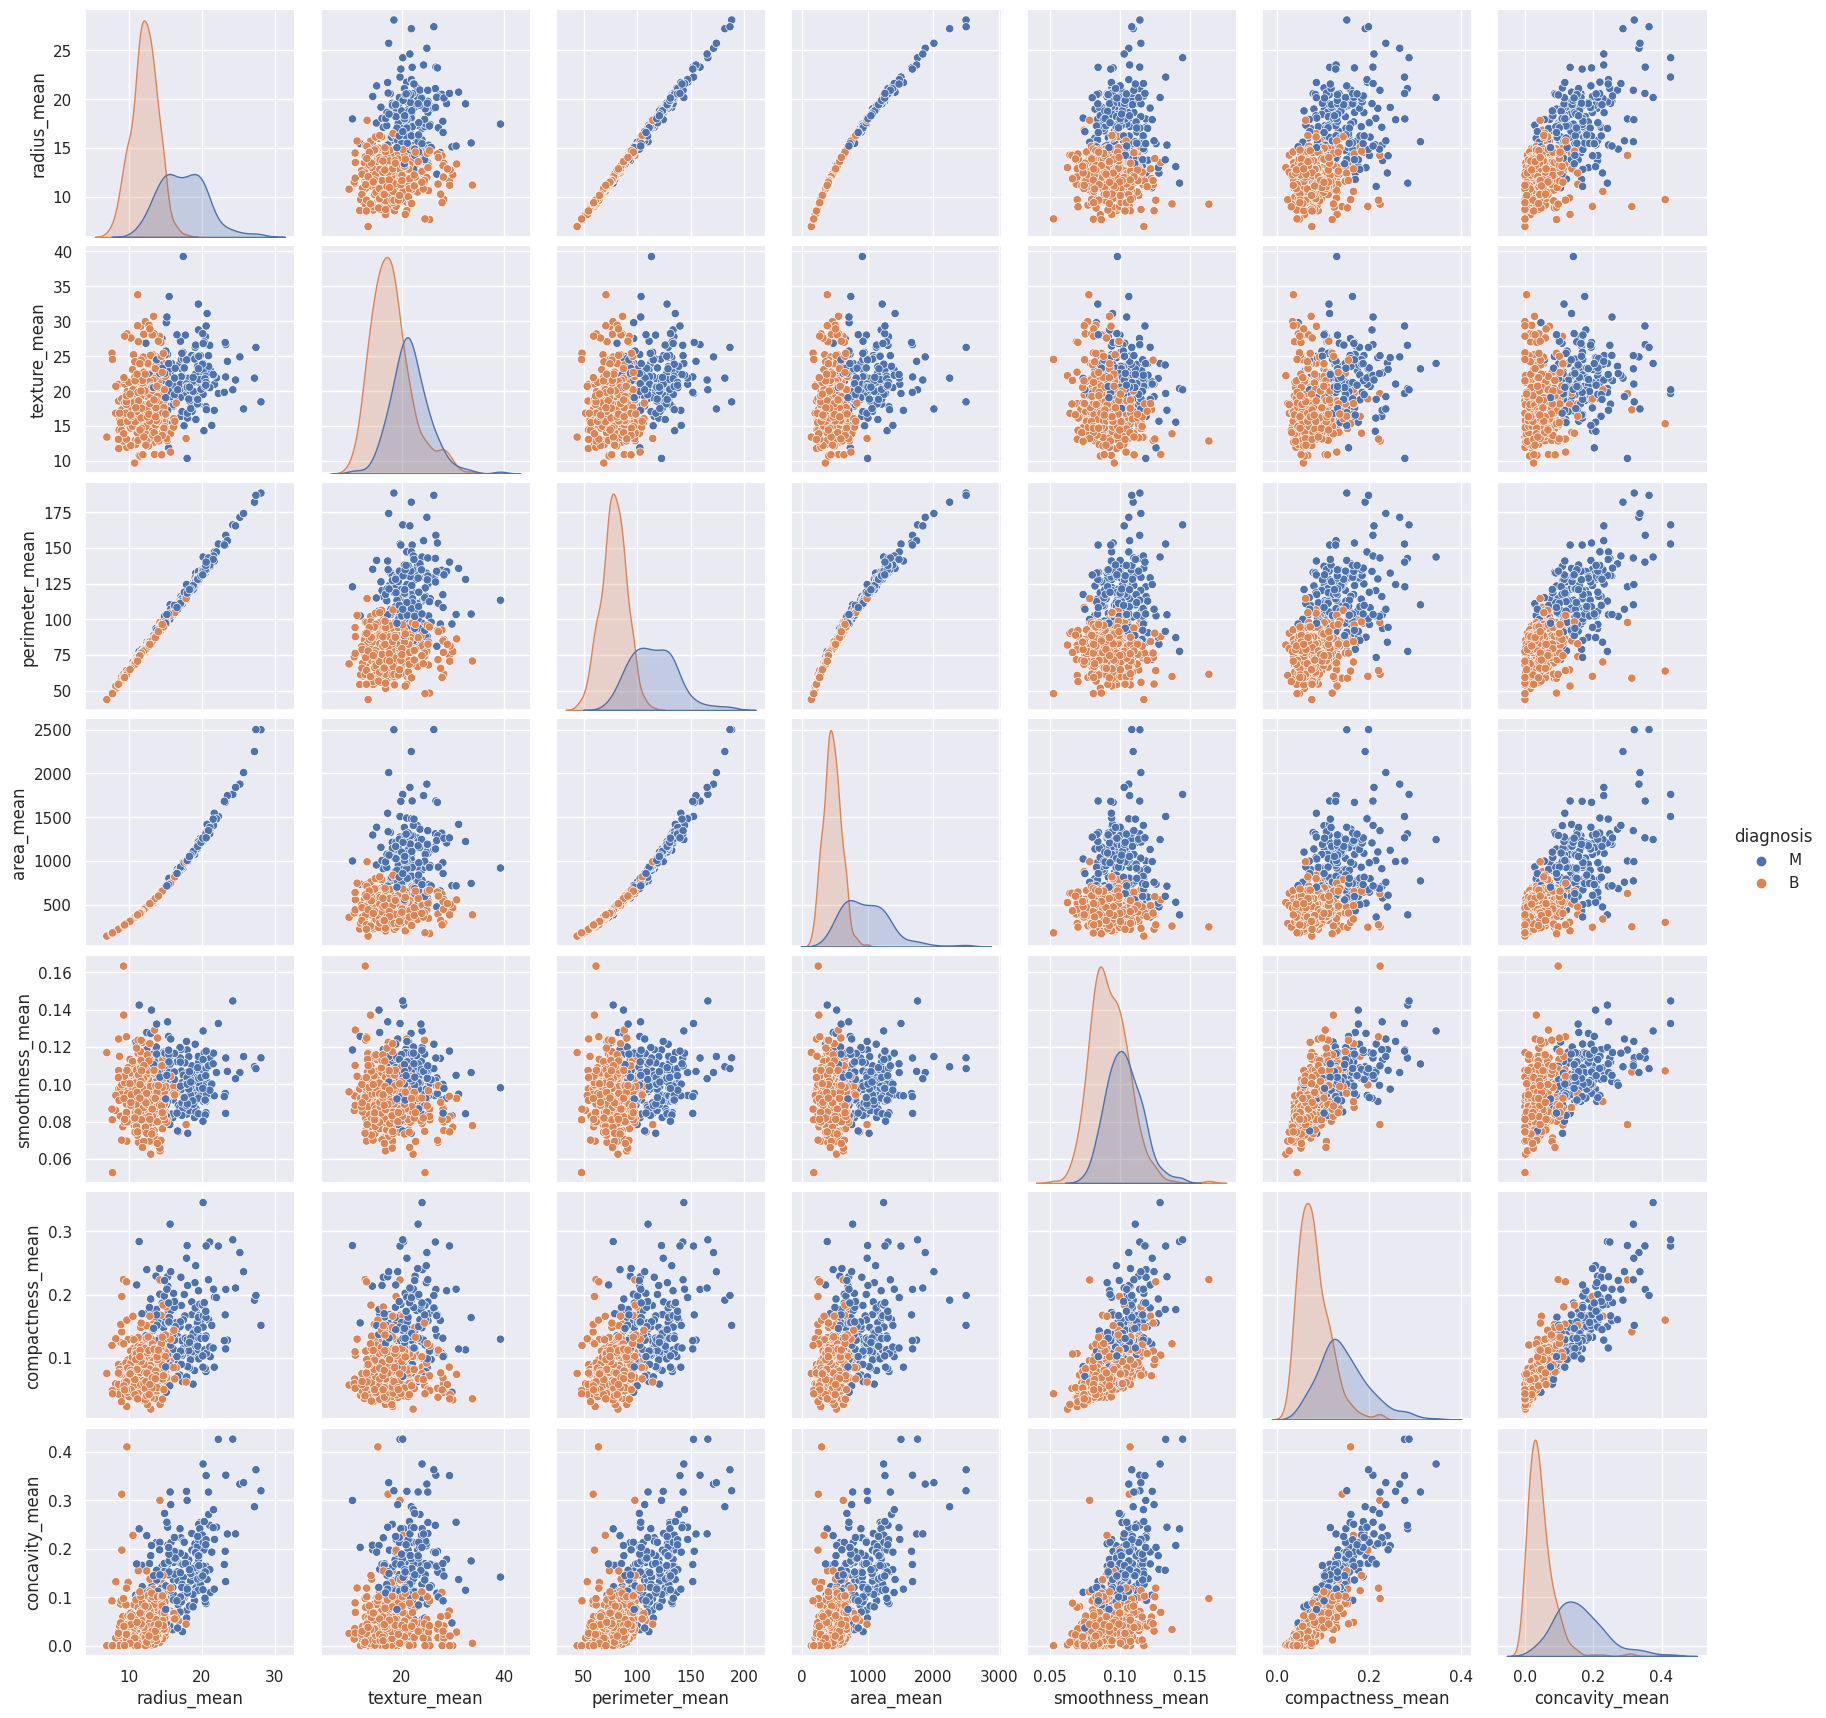

In [101]:
# plotting a pairplot of a sample of features between mean values of
#radius,texture,perimeter,area,smoothness,compactness and concavity
sns.set()
cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'diagnosis']
sns.pairplot(dataset_csv[cols], hue = 'diagnosis', height = 2.5)
plt.show()

In [102]:
#The Blue ones indicates Malignant tumour and Orange ones indicates Benign tumour.

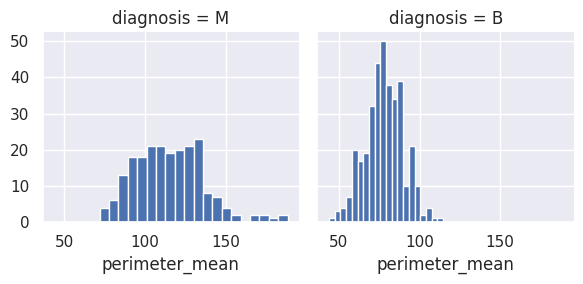

In [103]:
## Histogram betweeen perimeter_mean and diagnosis is plotted below
g=sns.FacetGrid(dataset_csv, col = 'diagnosis')
g.map(plt.hist,'perimeter_mean', bins = 20)

<Axes: >

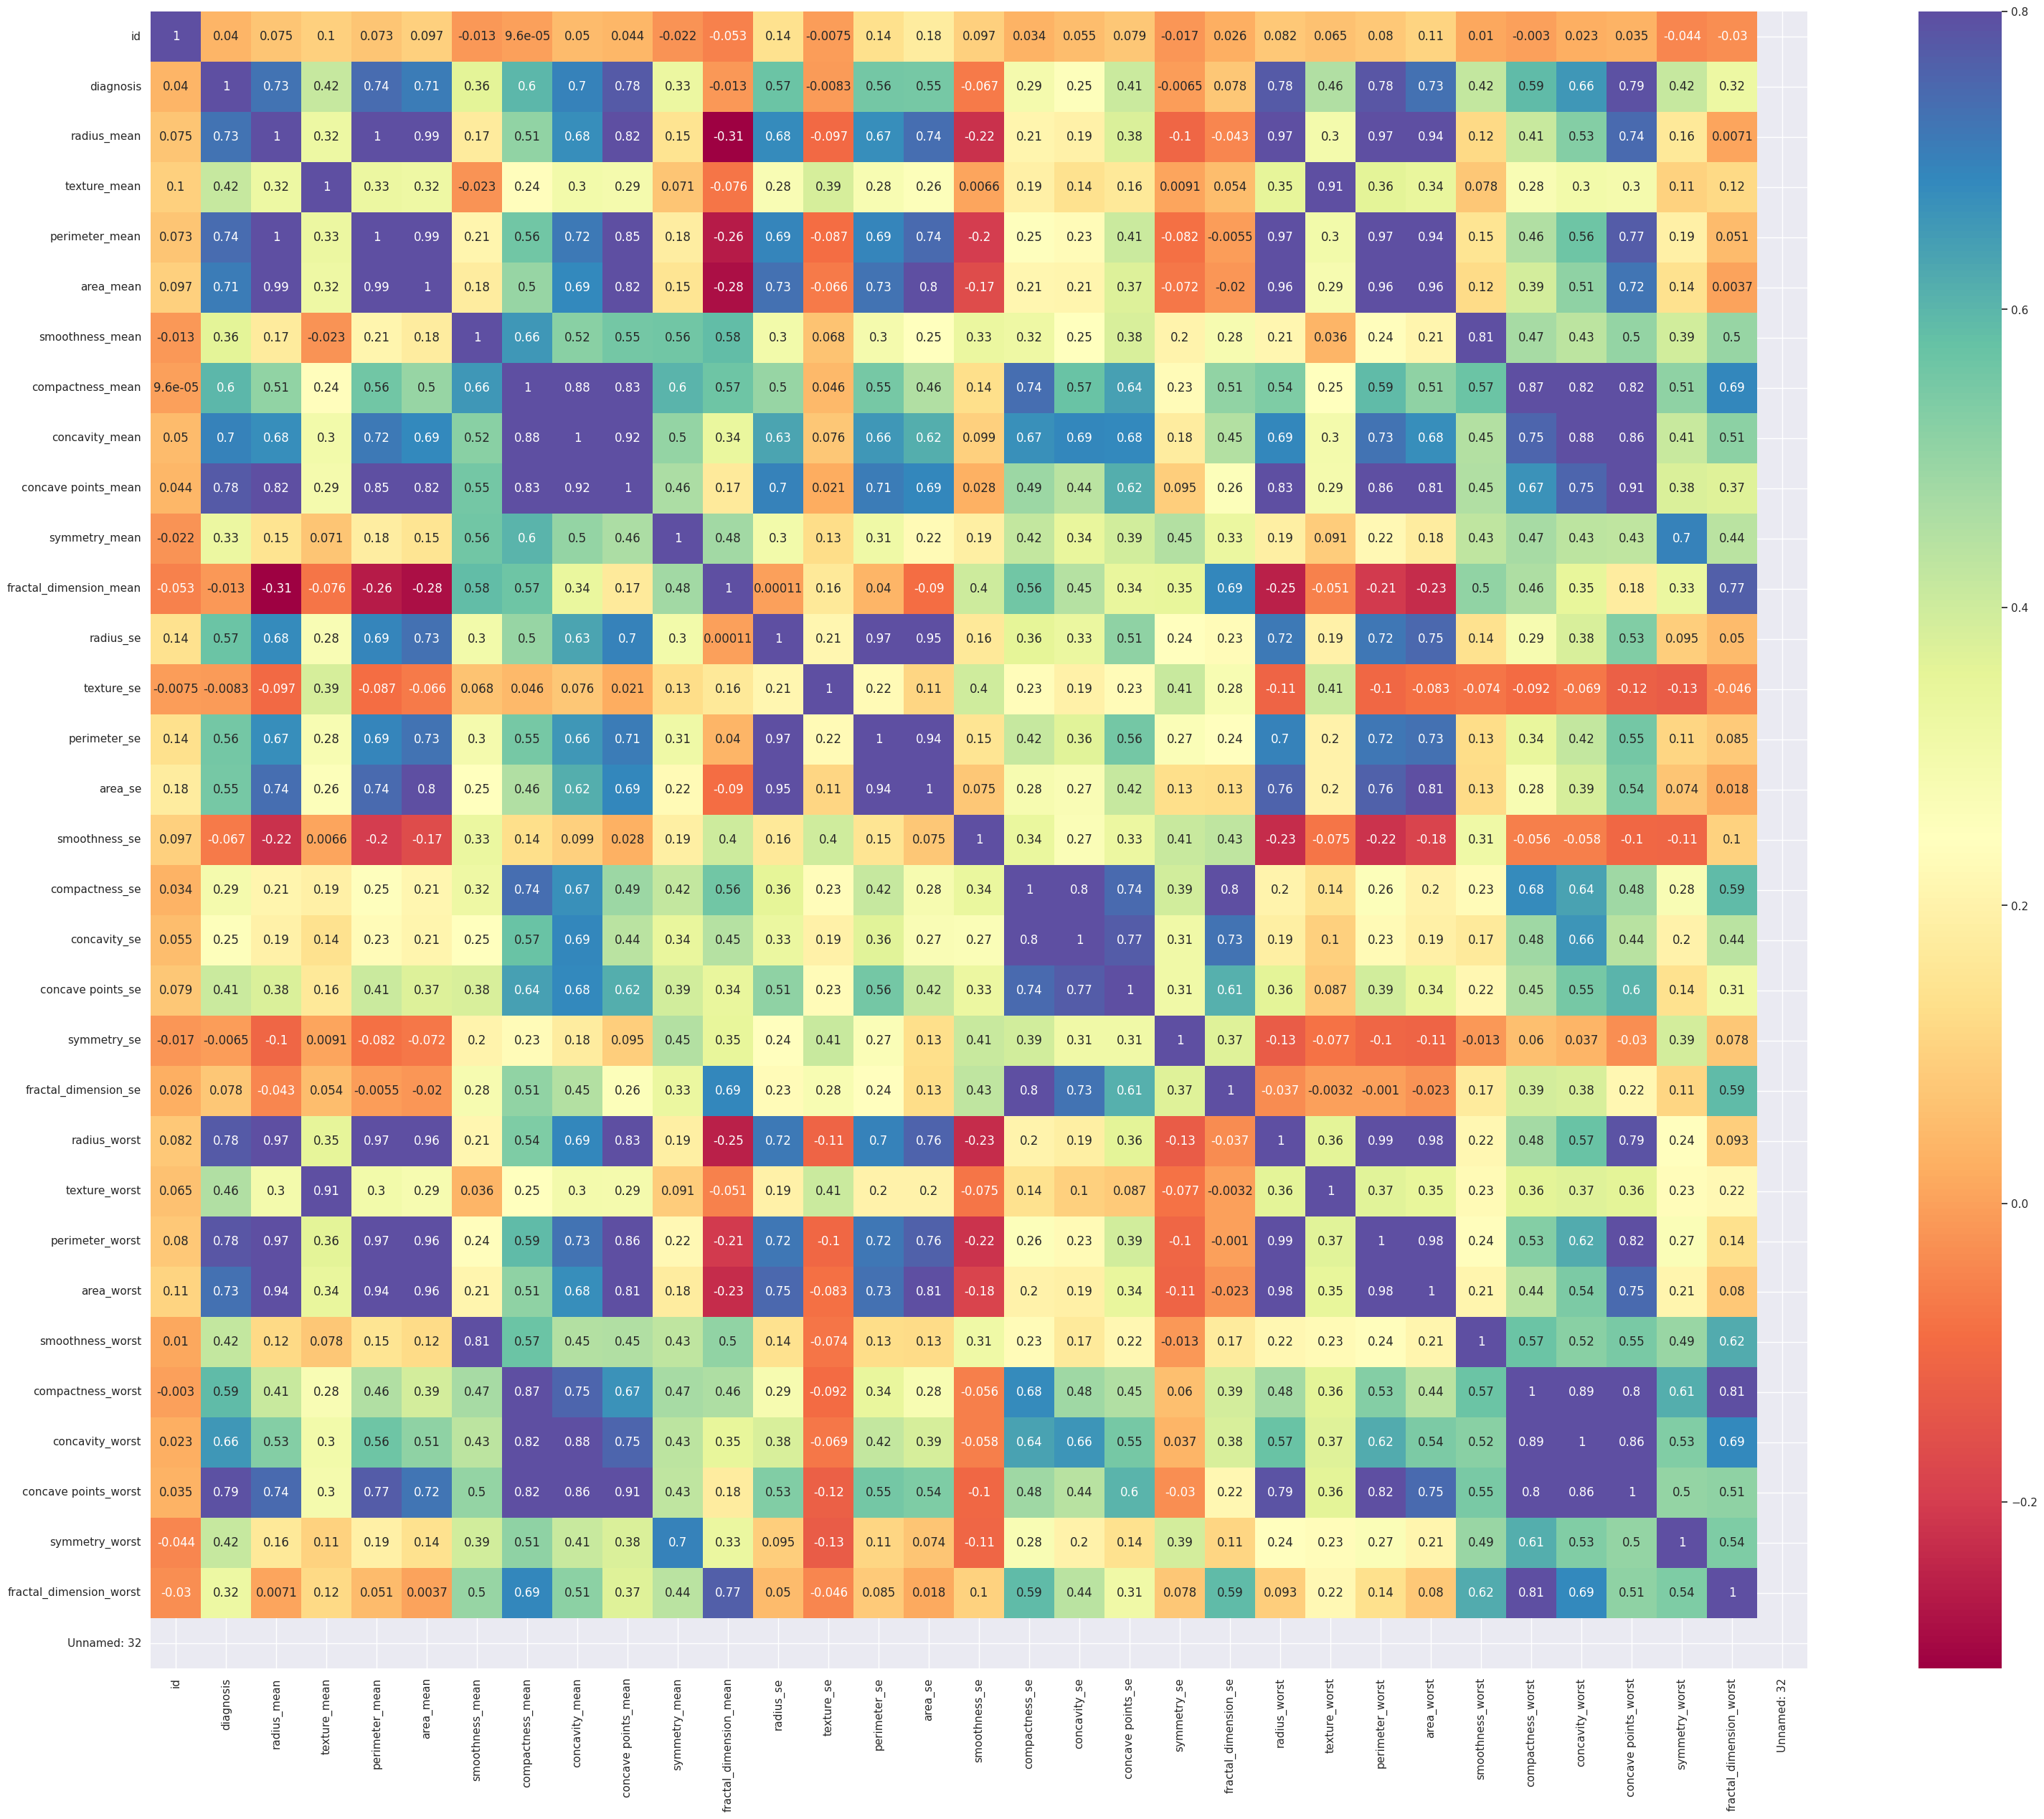

In [104]:
#Here we are mapping the values to 0 to 1
# b as 0 and M as 1
mapping = {'B':0, 'M':1}
dataset_csv['diagnosis'] = dataset_csv['diagnosis'].map(mapping)
# Presenting the heatmap as a correlation matrix
corrmat = dataset_csv.corr()
f, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True, cmap = 'Spectral')

In [105]:
#obtaining a better dataset
y = dataset_csv['diagnosis'] ### Our target variable
X = dataset_csv.drop(['diagnosis'], axis = 1) ### Input features
y.head(3)


0    1
1    1
2    1
Name: diagnosis, dtype: int64

In [106]:
###splitting dataset into train and test sets with train to test set ratio as 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [108]:
# Split the data into training and test sets
def train_test_split(df, test_ratio):
    num_rows = df.shape[0]
    num_test_rows = int(num_rows * test_ratio)
    test_indices = random.sample(range(num_rows), num_test_rows)
    test_set = df.iloc[test_indices]
    train_set = df.drop(test_indices)
    return train_set, test_set

In [109]:
df = pds.read_csv('data.csv')
pds.read_csv('data.csv')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [110]:
# Function to fit label encoder
def label_encoder_fit(x):
    unique_values = np.unique(x)
    labels = {value: i for i, value in enumerate(unique_values)}
    return labels

In [111]:
###splitting dataset into train and test sets with train to test set ratio as 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Data cleaning and imputation
# Assuming X_train and X_test are your original datasets

# Replace missing values with the mean of each feature
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_imputed)
X_test_sc = scaler.transform(X_test_imputed)


In [119]:
# Random Forest classification
# Data imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Random Forest classification
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_imputed, y_train)
Y_pred_rf = random_forest.predict(X_test_imputed)
acc_random_forest = accuracy_score(y_test, Y_pred_rf)
print("Accuracy using Random Forest:", acc_random_forest * 100)


Accuracy using Random Forest: 95.6140350877193


In [118]:
# Decision Tree classification

# Data imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Decision Tree classification
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_imputed, y_train)
Y_pred_dt = decision_tree.predict(X_test_imputed)
acc_decision_tree = accuracy_score(y_test, Y_pred_dt)
print("Accuracy using Decision Tree:", acc_decision_tree * 100)


Accuracy using Decision Tree: 93.85964912280701
